In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
sns.set(rc={'figure.figsize':(9,6)})


In [3]:

events_data = pd.read_csv(r"C:/Users/Professional/Downloads/event_data_train.zip")

In [5]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [6]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [40]:
submissions_data['date']=pd.to_datetime(submissions_data.timestamp,unit='s')
submissions_data['day']=submissions_data.date.dt.date

In [7]:
events_data['date']=pd.to_datetime(events_data.timestamp,unit='s')

In [8]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [9]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [10]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [11]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [12]:
events_data['day']=events_data.date.dt.date


In [13]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [16]:
events_data.groupby('day').user_id.nunique()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
             ... 
2018-05-15    145
2018-05-16    155
2018-05-17    165
2018-05-18    126
2018-05-19    131
Name: user_id, Length: 1070, dtype: int64

<Axes: xlabel='day'>

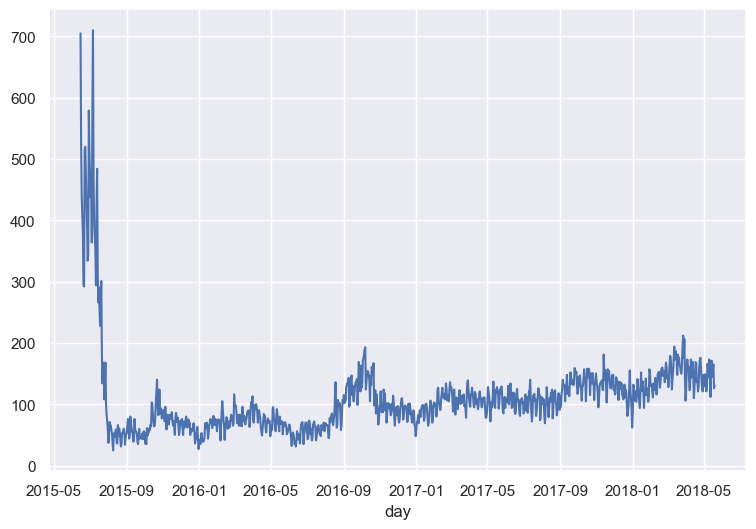

In [19]:
events_data.groupby('day').user_id.nunique().plot()

In [20]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [25]:
events_data[events_data.action=='passed'].groupby('user_id',as_index=False).head()

,step_id,timestamp,action,user_id,date,day
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15
12,32814,1434340950,passed,17632,2015-06-15 04:02:30,2015-06-15
16,32812,1434341039,passed,17632,2015-06-15 04:03:59,2015-06-15
...,...,...,...,...,...,...
3480339,32811,1526762701,passed,943,2018-05-19 20:45:01,2018-05-19
3480352,32929,1526762781,passed,943,2018-05-19 20:46:21,2018-05-19
3480355,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19
3480671,32950,1526770439,passed,26659,2018-05-19 22:53:59,2018-05-19


In [26]:
events_data[events_data.action=='passed']

,step_id,timestamp,action,user_id,date,day
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15
12,32814,1434340950,passed,17632,2015-06-15 04:02:30,2015-06-15
16,32812,1434341039,passed,17632,2015-06-15 04:03:59,2015-06-15
...,...,...,...,...,...,...
3480679,32179,1526771246,passed,19410,2018-05-19 23:07:26,2018-05-19
3480680,32182,1526771250,passed,19410,2018-05-19 23:07:30,2018-05-19
3480692,33373,1526772469,passed,11677,2018-05-19 23:27:49,2018-05-19
3480696,33375,1526772685,passed,11677,2018-05-19 23:31:25,2018-05-19


In [32]:
events_data[events_data.action=='passed'].groupby('user_id',as_index=False).agg({'step_id':'count'}).rename(columns={'step_id':'passed_steps'}).head(100)

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84
...,...,...
95,149,198
96,151,1
97,152,11
98,154,5


<Axes: >

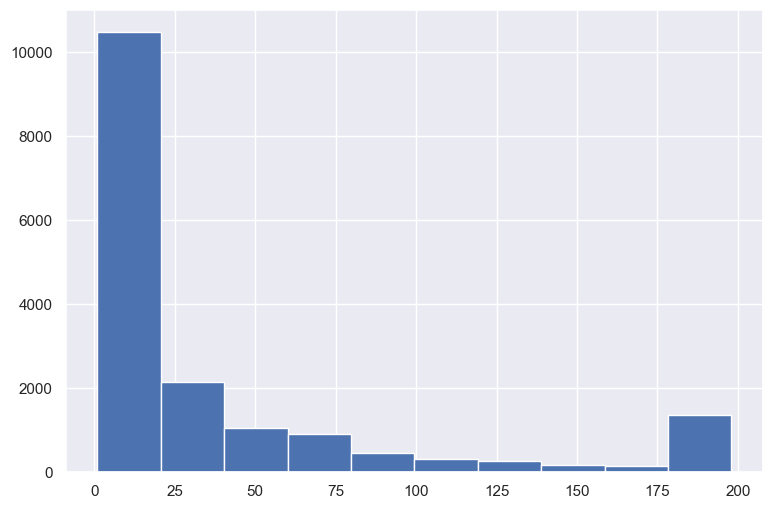

In [31]:
events_data[events_data.action=='passed'].groupby('user_id',as_index=False).agg({'step_id':'count'}).rename(columns={'step_id':'passed_steps'})\
.passed_steps.hist()

In [33]:
events_data[events_data.action=='passed'].groupby('user_id',as_index=False).agg({'step_id':'count'}).rename(columns={'step_id':'passed_steps'})\
.passed_steps.min()

np.int64(1)

In [34]:
events_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',fill_value=0).head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


In [37]:
events_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


<Axes: >

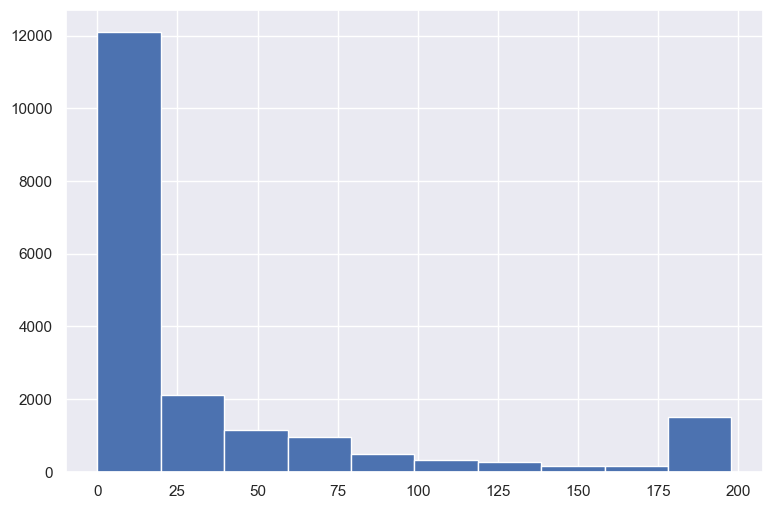

In [36]:
events_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',fill_value=0).reset_index().discovered\
.hist()

In [38]:
submissions_data = pd.read_csv(r"C:/Users/Professional/Downloads/submissions_data_train.zip")

In [39]:
submissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [41]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [42]:
users_scores=submissions_data.pivot_table(index='user_id',columns='submission_status',values='step_id',aggfunc='count',fill_value=0).reset_index()

In [43]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [45]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [47]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
.groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [49]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
.groupby('user_id')['timestamp'].apply(list)\
.apply(np.diff)

user_id
1                                                       []
2                                                [4843602]
3         [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                               [33702812]
7                                                       []
                               ...                        
26790                           [238225, 893964, 64879648]
26793                                                   []
26794    [86128, 136759, 94899, 1422583, 14347289, 5050...
26797                                            [1567990]
26798                                                   []
Name: timestamp, Length: 19234, dtype: object

In [51]:
gap_data=events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
.groupby('user_id')['timestamp'].apply(list)\
.apply(np.diff).values

In [52]:
gap_data

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int64)], dtype=object)

In [54]:
np.concatenate(gap_data,axis=0)

array([4843602, 6899249,  182484, ...,   98252,   57019, 1567990])

In [55]:
gap_data=pd.Series(np.concatenate(gap_data,axis=0))

In [56]:
gap_data

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int64

In [58]:
gap_data=gap_data/(24*60*60)

In [67]:
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<Axes: >

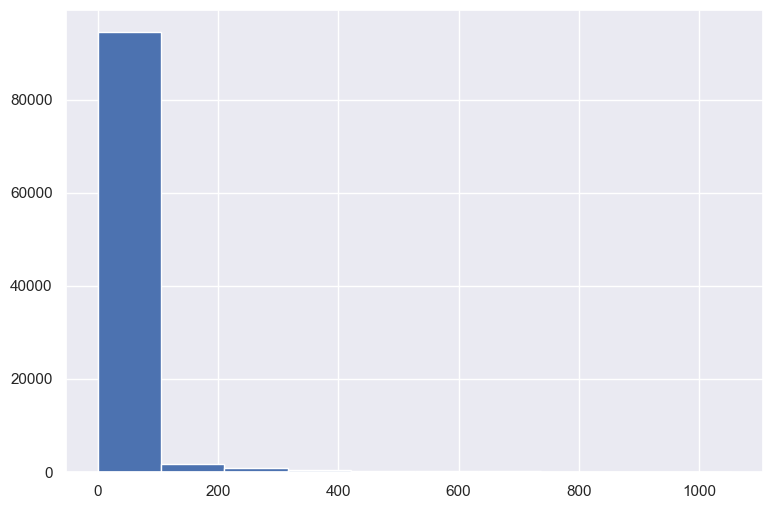

In [59]:
gap_data.hist()

<Axes: >

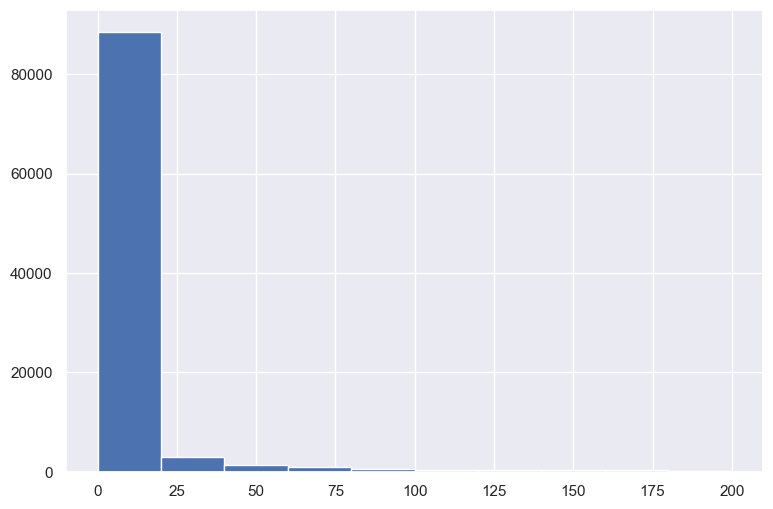

In [60]:
gap_data[gap_data<200].hist()

In [61]:
gap_data.quantile(0.95)

np.float64(59.760440972222156)

In [76]:
events_data.groupby('user_id')['day'].nunique().idxmax()

np.int64(1046)

In [80]:
submissions_data.query('submission_status == "correct"')\
                                .groupby('user_id', as_index = False)\
                                .agg({'submission_status': 'count'})\
                                .rename(columns = {'submission_status' : 'count_submissions'})\
                               .sort_values('count_submissions', ascending = False).reset_index().head(1)

,index,user_id,count_submissions
0,433,1046,421


In [81]:
max_correct_attempts = users_scores['correct'].max()
users_scores[users_scores.correct == max_correct_attempts]

submission_status,user_id,correct,wrong
439,1046,421,513


In [82]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [95]:
events_data.groupby('user_id',as_index=False).agg({'timestamp':'max'})

,user_id,timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
...,...,...
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096


In [85]:
users_data=events_data.groupby('user_id',as_index=False).agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'})

In [96]:
users_data['is_gone_user']=1526772811-users_data.last_timestamp

In [97]:
users_data

,user_id,last_timestamp,is_gone_user
0,1,1472827464,53945347
1,2,1519226966,7545845
2,3,1444581588,82191223
3,5,1499859939,26912872
4,7,1521634660,5138151
...,...,...,...
19229,26790,1517495987,9276824
19230,26793,1510225034,16547777
19231,26794,1512035039,14737772
19232,26797,1509995096,16777715


In [98]:
now =1526772811

In [99]:
drop_out_threshold=2592000

In [100]:
users_data['is_gone_user']=now-users_data.last_timestamp>drop_out_threshold

In [101]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [102]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [103]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [107]:
users_data=users_data.merge(users_scores,on='user_id',how='outer')

In [108]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,NaN,NaN
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [109]:
users_data=users_data.fillna(0)

In [110]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [111]:
users_events_data=events_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',fill_value=0).reset_index()

In [112]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [113]:
users_data=users_data.merge(users_events_data,how='outer')

In [114]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [116]:
users_days=events_data.groupby('user_id').day.nunique()

In [117]:
users_days.head()

user_id
1    1
2    2
3    7
5    2
7    1
Name: day, dtype: int64

In [121]:
users_days=users_days.to_frame().reset_index()

In [122]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [123]:
users_data=users_data.merge(users_days,how='outer')

In [124]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [125]:
users_data.user_id.nunique()

19234

In [126]:
events_data.user_id.nunique()

19234

In [127]:
users_data['passed_corse']=users_data.passed>170

In [128]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [129]:
users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [130]:
100*1425/17809

8.001572238755685